#Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [19]:
ipl = pd.read_csv('https://raw.githubusercontent.com/Vivekfreak/Datasets/refs/heads/main/ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


#**Data Preprocessing**

### Dropping unimportant columns

In [20]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

### Further processing data

In [21]:
### Split data into dependent and independent variable
x = df.drop('total', axis= 1)
y = df['total']

#**Level Encoding**

* We have applied label encoding to your categorical features in X.
* We have created separate LabelEncoder objects for each categorical feature and encoded their values.





In [22]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

x['venue'] = venue_encoder.fit_transform(x['venue'])
x['bat_team'] = batting_team_encoder.fit_transform(x['bat_team'])
x['bowl_team'] = bowling_team_encoder.fit_transform(x['bowl_team'])
x['batsman'] = batsman_encoder.fit_transform(x['batsman'])
x['bowler'] = bowler_encoder.fit_transform(x['bowler'])

#**Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Define Neural Network**

In [25]:
model = keras.Sequential([
    keras.layers.Input(shape= (x_train_scaled.shape[1],)), #Input layer
    keras.layers.Dense(512, activation = 'relu'), #Hidden layer with 512 units & ReLU activation
    keras.layers.Dense(216, activation = 'relu'), #Hidden layer with 216 units & ReLU activation
    keras.layers.Dense(1, activation = 'linear'), #Output layer with Linear activation for regression
])

In [51]:
# COmpile the Model with Huberloss
huber_loss= tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer = 'adam', loss = huber_loss, metrics = ['mae'])

#**Model Training**

In [52]:
model.fit(x_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(x_test_scaled,y_test))

Epoch 1/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 18.8341 - mae: 19.3253 - val_loss: 18.8860 - val_mae: 19.3775
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 18.6017 - mae: 19.0920 - val_loss: 18.4748 - val_mae: 18.9672
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 18.7659 - mae: 19.2574 - val_loss: 19.3703 - val_mae: 19.8646
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 18.5435 - mae: 19.0347 - val_loss: 20.1500 - val_mae: 20.6443
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 18.4373 - mae: 18.9286 - val_loss: 18.4837 - val_mae: 18.9746
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.4498 - mae: 18.9407 - val_loss: 19.1832 - val_mae: 19.6755
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.3993 - mae: 18.8899 - val_loss: 18.2576 - val_mae: 18.7490
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 18.3316 - mae: 18.8227 - val_loss: 18.1866 - val_mae: 18.6784
Epoch 9/50
951/951 ━━━━━

<Axes: >

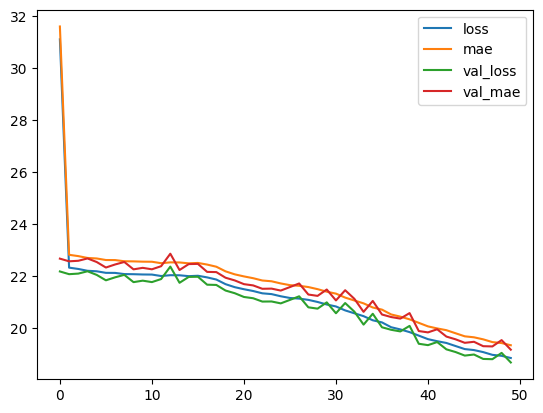

In [28]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

#**Model Evaluation**

In [29]:
predictions = model.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


19.168636996236543

Interactive Widget

In [49]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')

venue= widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:'  )
batting_team= widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team= widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
batsman  = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Batsman:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button =widgets.Button(description='Predict Score')
def predict_score(b):
  with output:
    clear_output()
    display(predicted_score)

In [50]:
# Get the selected values from the widgets
 # Decode the encoded values back to their original values
decoded_venue = venue_encoder.transform([venue.value])
decoded_batting_team = batting_team_encoder.transform([batting_team.value])
decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
decoded_batsman = batsman_encoder.transform([batsman.value])
decoded_bowler = bowler_encoder.transform([bowler.value])

# Create a numpy array with the decoded values
input = np.array([[decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_batsman, decoded_bowler]])
input = input.reshape (1,5)
input = scaler.transform(input)
#print(input)
predicted_score = model.predict(input)
predicted_score = int(predicted_score[0,0])

print(predicted_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
173


In [46]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, batsman, bowler, predict_button, output)

Dropdown(description='Select Venue:', index=34, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association …

Dropdown(description='Select Batting Team:', index=13, options=('Kolkata Knight Riders', 'Chennai Super Kings'…

Dropdown(description='Select Bowling Team:', index=13, options=('Royal Challengers Bangalore', 'Kings XI Punja…

Dropdown(description='Select Batsman:', index=5, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Husse…

Dropdown(description='Select Bowler:', index=34, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB J…

Button(description='Predict Score', style=ButtonStyle())

Output()